""" this is the EDA for numeric vars"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import partial
from sklearn.preprocessing import StandardScaler

In [2]:
# Global, all the numeric var in the data
NUMERIC_VAR = ['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',]


In [4]:
def boxplot_outliers(df:pd.DataFrame, col:str):
    """
    find the outliers acording to interquartile range
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.
    outliers_bool = (df[col] <= Q1 - 1.5 * IQR) | (df[col] >= Q3 + 1.5 *IQR)
    return df[col][outliers_bool]



In [11]:
train_df = pd.read_csv("C:/Users/weitz/Documents/PhD/ML-project/train_cohort.csv")
# print(train_df.head())

## pop the index redandent colomn 
train_df.pop('Unnamed: 0')
train_df = train_df.set_index('encounter_id')
print(train_df.head())

              patient_nbr             race  gender      age weight  \
encounter_id                                                         
2278392           8222157        Caucasian  Female   [0-10)    NaN   
149190           55629189        Caucasian  Female  [10-20)    NaN   
64410            86047875  AfricanAmerican  Female  [20-30)    NaN   
500364           82442376        Caucasian    Male  [30-40)    NaN   
16680            42519267        Caucasian    Male  [40-50)    NaN   

              admission_type_id  discharge_disposition_id  \
encounter_id                                                
2278392                       6                        25   
149190                        1                         1   
64410                         1                         1   
500364                        1                         1   
16680                         1                         1   

              admission_source_id  time_in_hospital payer_code  ...  \
encounter_

In [ ]:
dict_outliers = {}


for col in NUMERIC_VAR:
    dict_outliers.update({col : boxplot_outliers(train_df,col)})

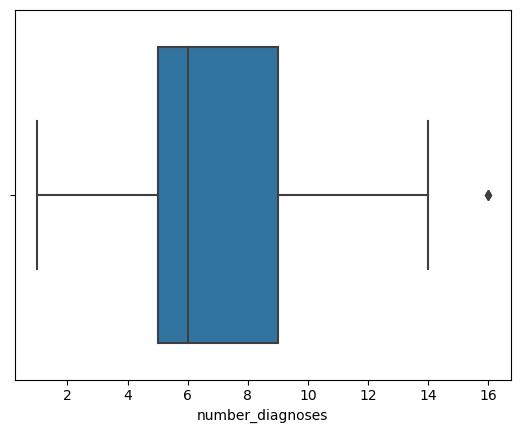

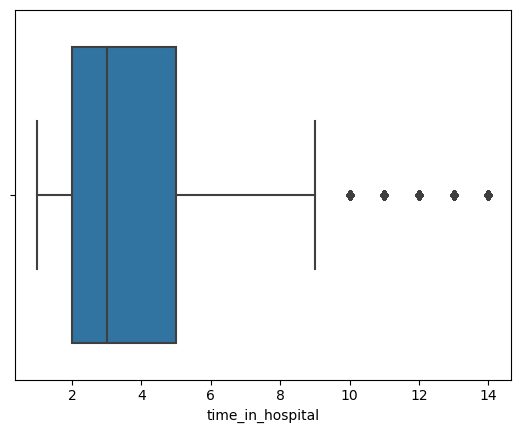

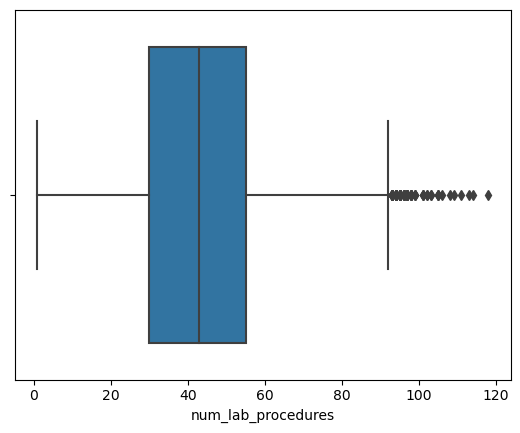

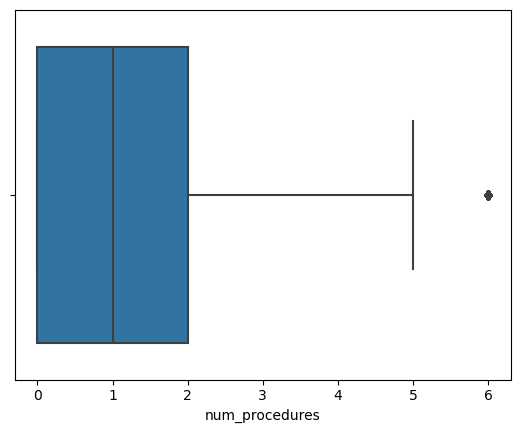

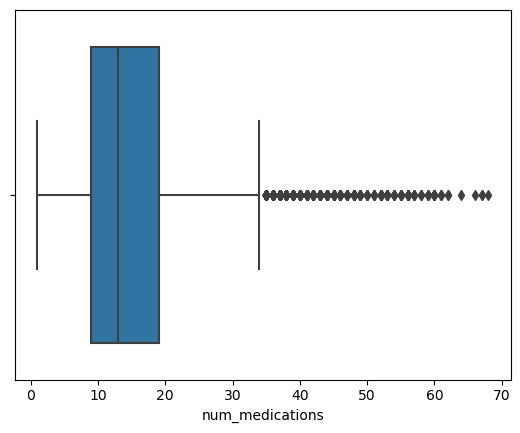

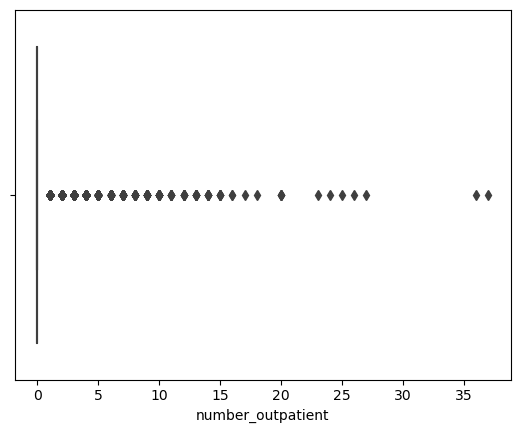

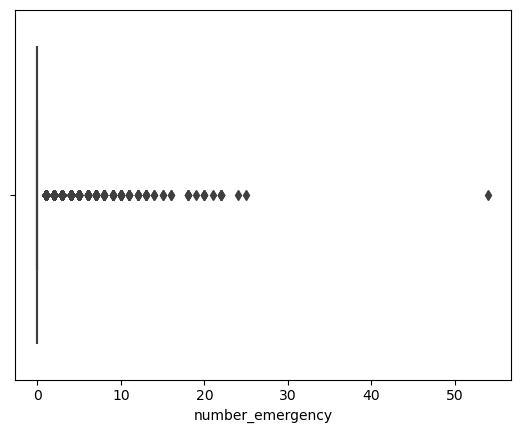

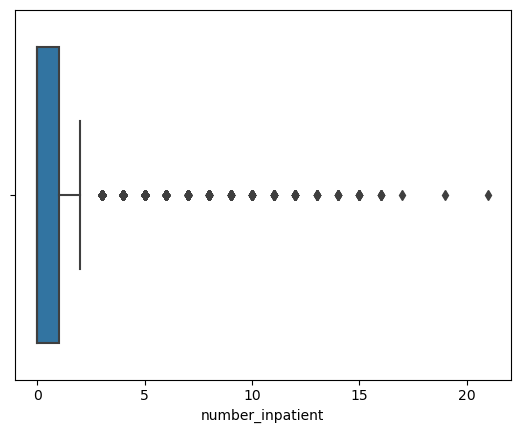

In [ ]:
# Creating individual plots
cols = NUMERIC_VAR
for var in cols:
    sns.boxplot(x=var, data=train_df)
    plt.show()

In [ ]:
for key, value in dict_outliers.items():
    print (key, len(value), np.unique(value))

number_diagnoses 2 [16]
time_in_hospital 1730 [10 11 12 13 14]
num_lab_procedures 86 [ 93  94  95  96  97  98  99 101 102 103 105 106 108 109 111 113 114 118]
num_procedures 1856 [5 6]
num_medications 683 [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 64 66 67 68]
number_outpatient 30420 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 23 24 25 26
 27 36 37]
number_emergency 30420 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 24 25
 54]
number_inpatient 2043 [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21]


In [61]:
df_long = train_df.melt(id_vars = ['race', 'gender', 'age'], value_vars = NUMERIC_VAR )
display(df_long)

displot = partial(sns.displot, 
                  data=df_long, kind='hist', kde=True, 
                  x='value', col='variable', 
                  col_wrap=3, common_bins=False,
                  facet_kws={'sharex': False, 'sharey': False})

displot2 = partial(sns.displot, 
                  data=df_long, kind='kde', 
                  x='value', col='variable', 
                  col_wrap=3, facet_kws={'sharex': False, 'sharey': False})
pairplot = partial(sns.pairplot, data=train_df[NUMERIC_VAR+['race', 'gender', 'age']],)

display(train_df[NUMERIC_VAR+['race', 'gender', 'age']])


race  gender      age          variable  value
0             Caucasian  Female   [0-10)  number_diagnoses      1
1             Caucasian  Female  [10-20)  number_diagnoses      9
2       AfricanAmerican  Female  [20-30)  number_diagnoses      6
3             Caucasian    Male  [30-40)  number_diagnoses      7
4             Caucasian    Male  [40-50)  number_diagnoses      5
...                 ...     ...      ...               ...    ...
243355        Caucasian  Female  [40-50)  number_inpatient      0
243356        Caucasian  Female  [70-80)  number_inpatient      0
243357        Caucasian  Female  [80-90)  number_inpatient      0
243358            Other    Male  [40-50)  number_inpatient      0
243359        Caucasian  Female  [70-80)  number_inpatient      0

[243360 rows x 5 columns]

number_diagnoses  time_in_hospital  num_lab_procedures  \
encounter_id                                                           
2278392                      1                 1                  41   
149190                       9                 3                  59   
64410                        6                 2                  11   
500364                       7                 2                  44   
16680                        5                 1                  51   
...                        ...               ...                 ...   
443811536                    5                14                  69   
443816024                    9                 3                  27   
443824292                    9                 3                  31   
443841992                    9                13                  51   
443842016                    9                 9                  50   

              num_procedures  num_medications  number_outpatient  \
encounter_id                                                       
2278392                    0                1                  0   
149190                     0               18                  0   
64410                      5               13                  2   
500364                     1               16                  0   
16680                      0                8                  0   
...                      ...              ...                ...   
443811536                  0               16                  0   
443816024                  1               29                  0   
443824292                  2               24                  0   
443841992                  2               13                  0   
443842016                  2               33                  0   

              number_emergency  number_inpatient             race  gender  \
encounter_id                                                                
2278392                      0                 0        Caucasian  Female   
149190                       0                 0        Caucasian  Female   
64410                        0                 1  AfricanAmerican  Female   
500364                       0                 0        Caucasian    Male   
16680                        0                 0        Caucasian    Male   
...                        ...               ...              ...     ...   
443811536                    0                 0        Caucasian  Female   
443816024                    1                 0        Caucasian  Female   
443824292                    0                 0        Caucasian  Female   
443841992                    0                 0            Other    Male   
443842016                    0                 0        Caucasian  Female   

                  age  
encounter_id           
2278392        [0-10)  
149190        [10-20)  
64410         [20-30)  
500364        [30-40)  
16680         [40-50)  
...               ...  
443811536     [40-50)  
443816024     [70-80)  
443824292     [80-90)  
443841992     [40-50)  
443842016     [70-80)  

[30420 rows x 11 columns]

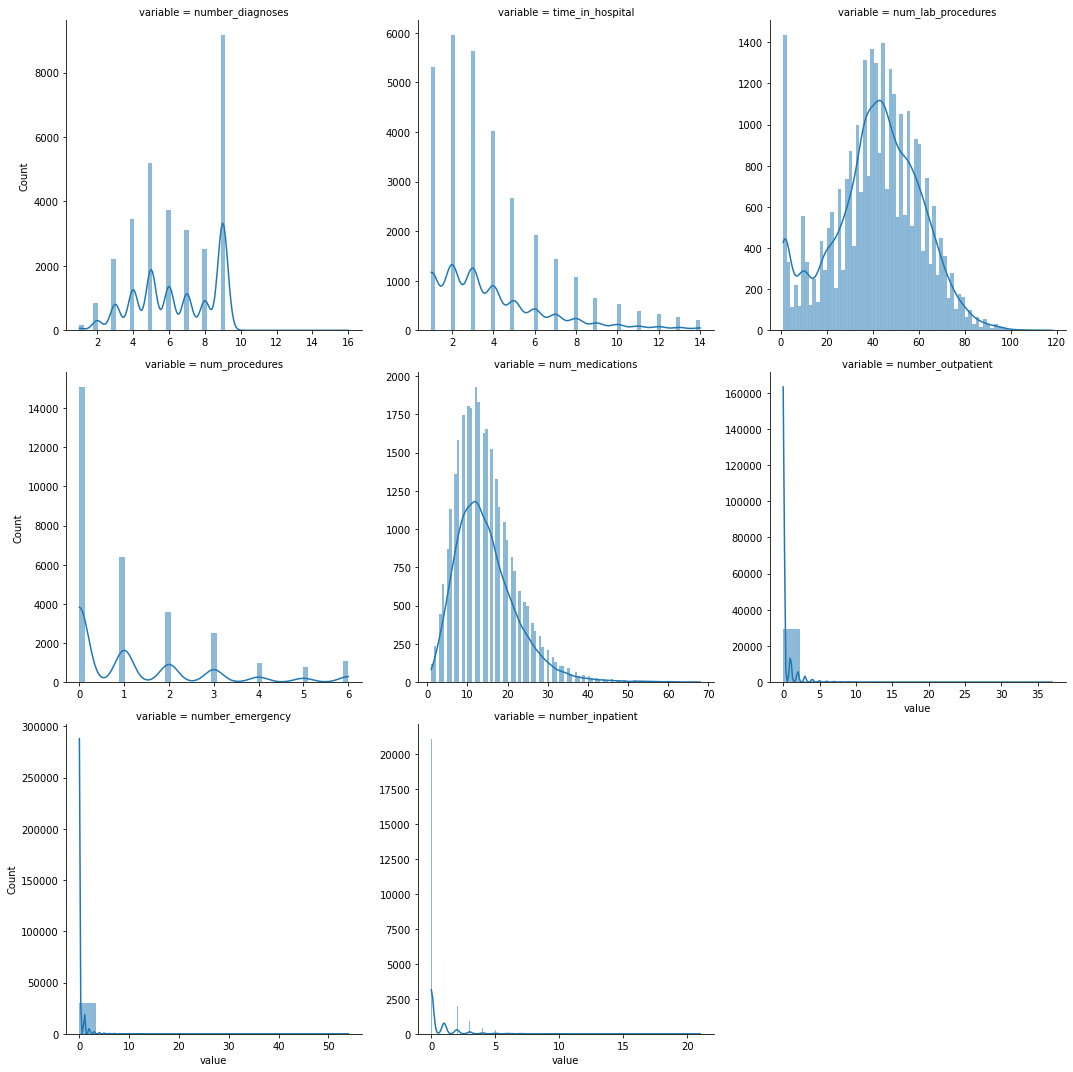

In [17]:
displot()
plt.show()

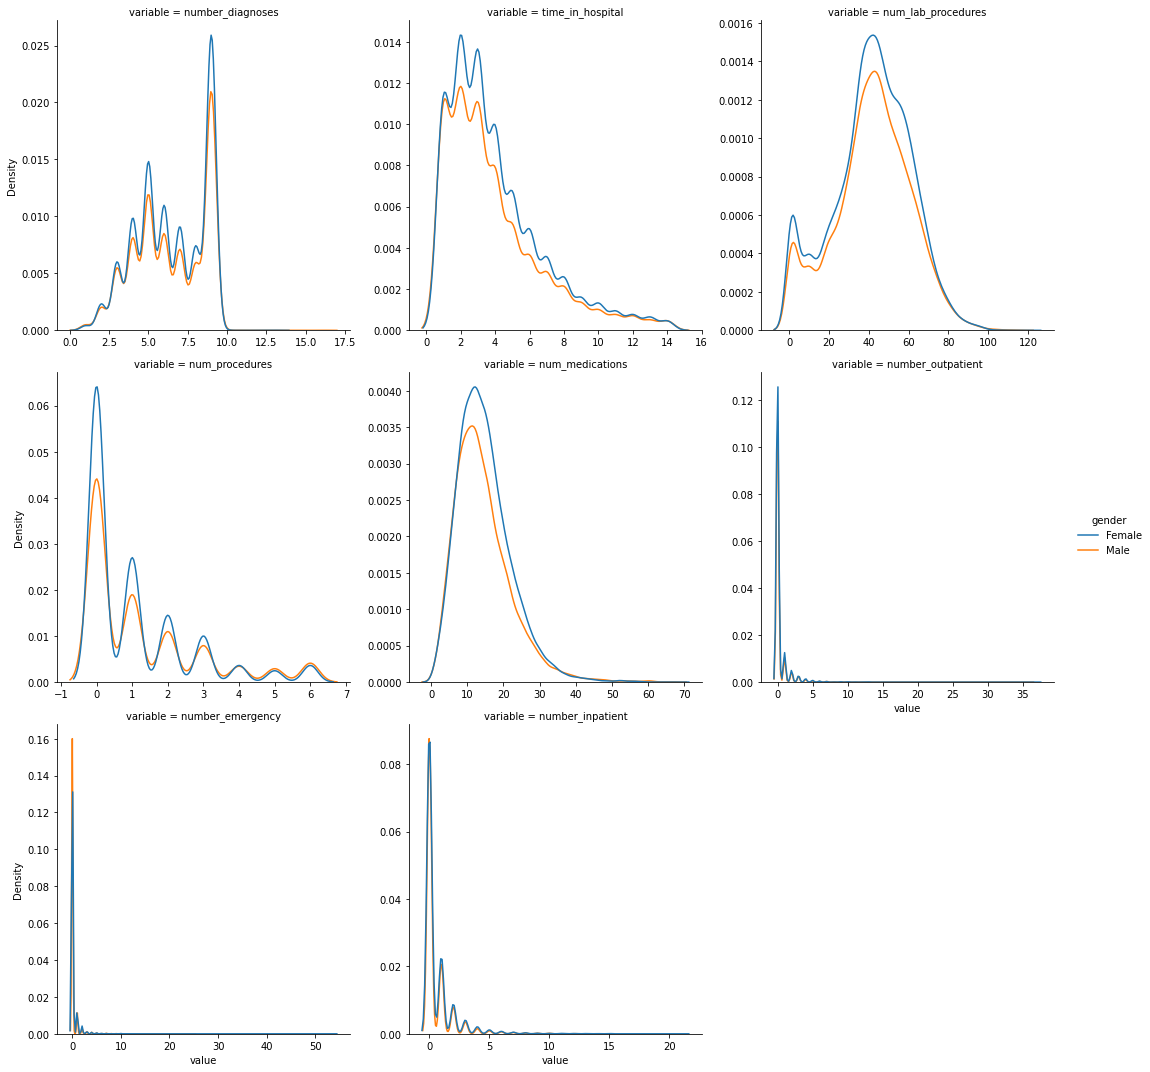

In [56]:
displot2(hue='gender', alpha=0.5)
plt.show()

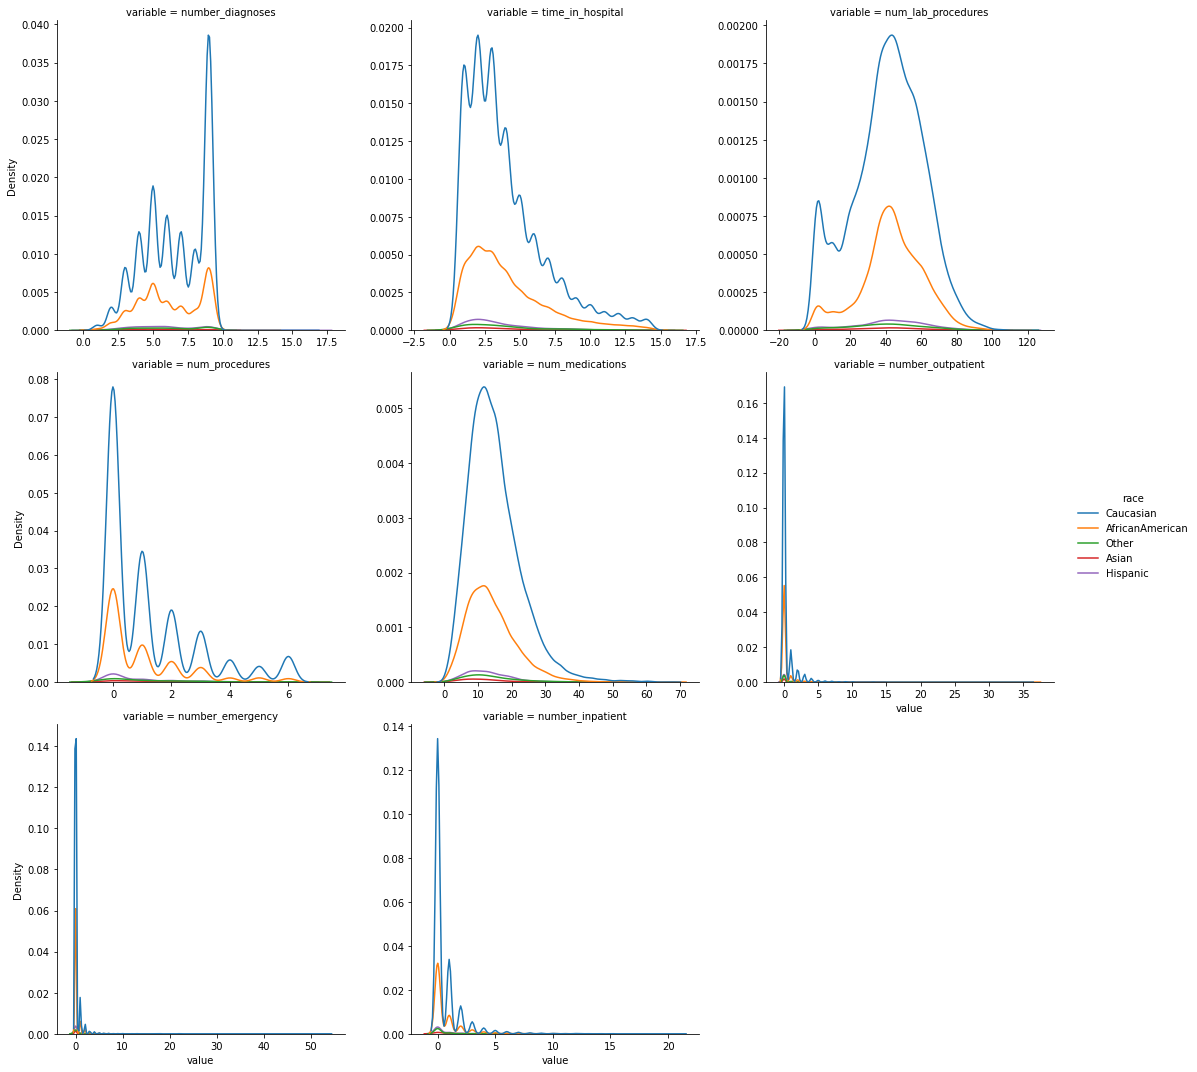

In [54]:
displot2(hue='race', alpha=0.5)
plt.show()

c:\Users\weitz\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


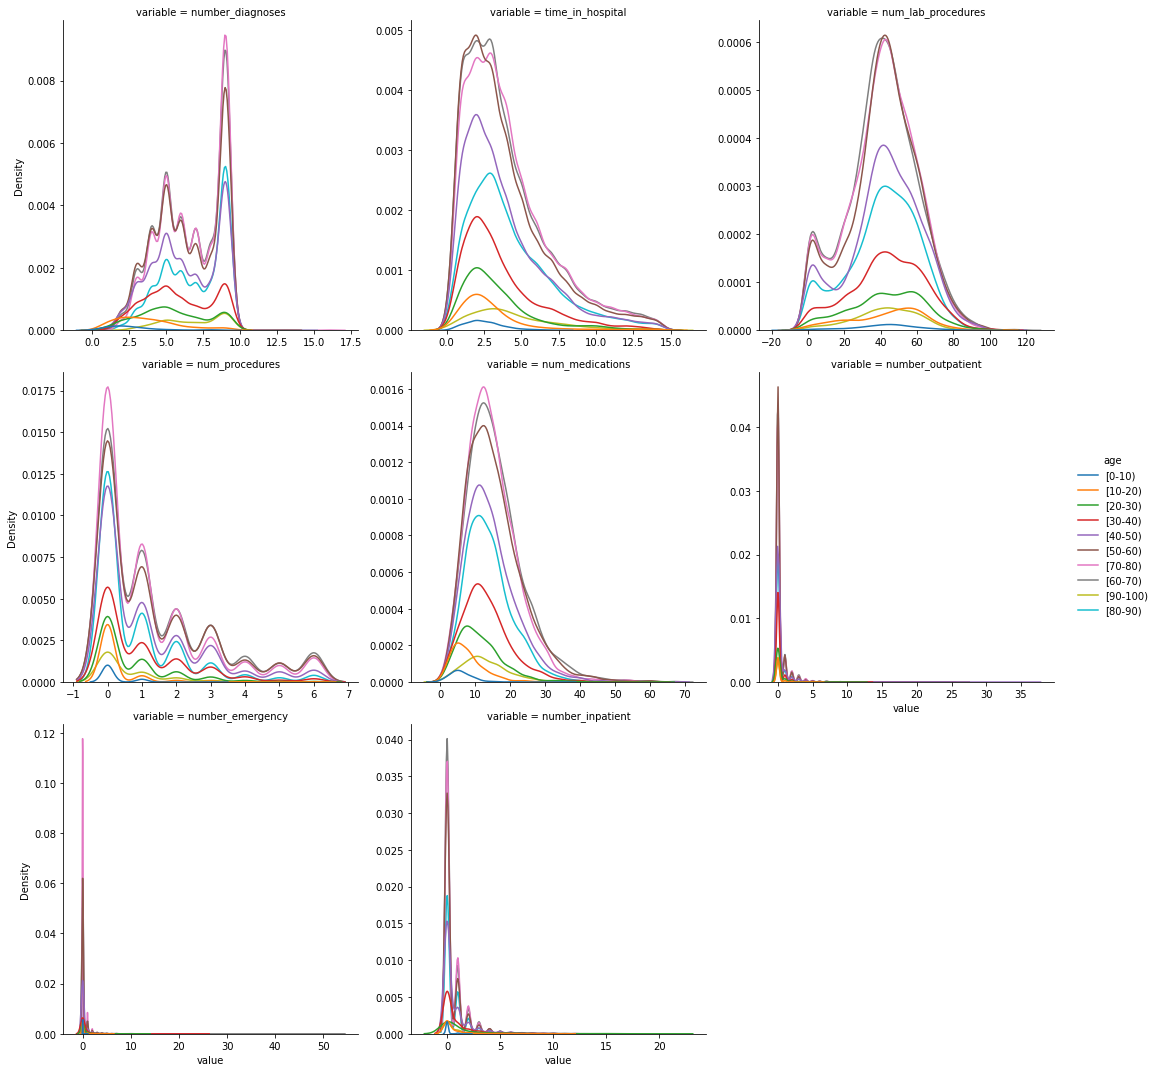

In [55]:
displot2(hue='age', alpha=0.5)
plt.show()



<Axes: xlabel='number_diagnoses', ylabel='num_lab_procedures'>

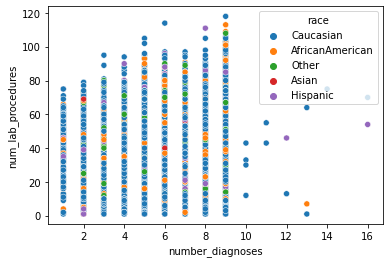

In [75]:
plot_df = train_df[NUMERIC_VAR+['race', 'gender', 'age']]
sns.scatterplot(data = plot_df,x= NUMERIC_VAR[0],y=NUMERIC_VAR[2],hue="race")

c:\Users\weitz\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


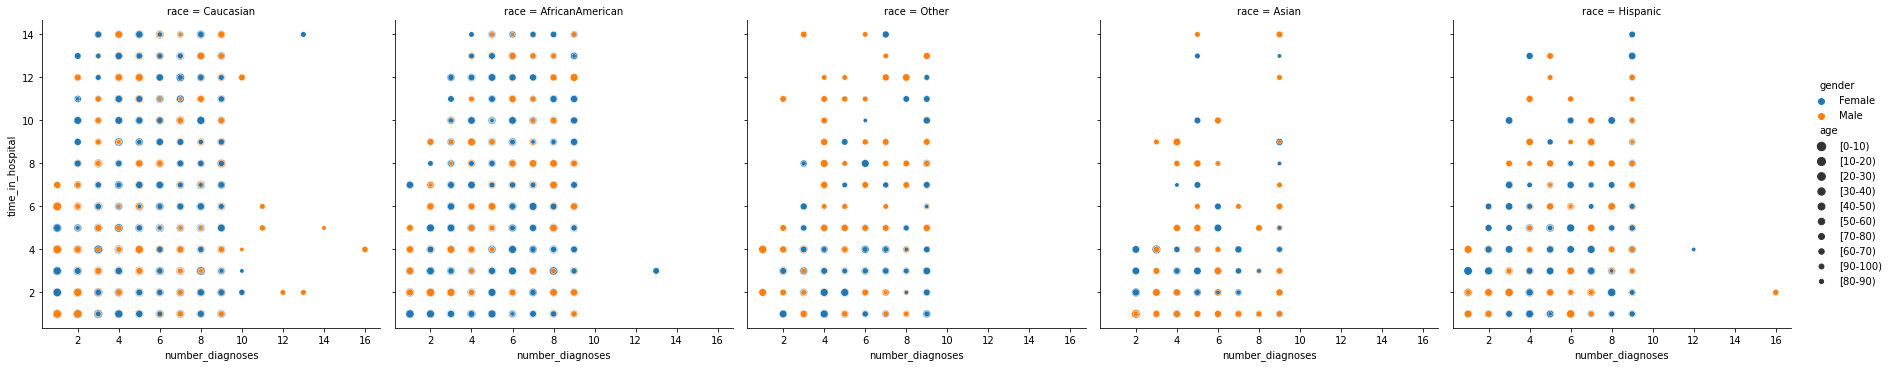

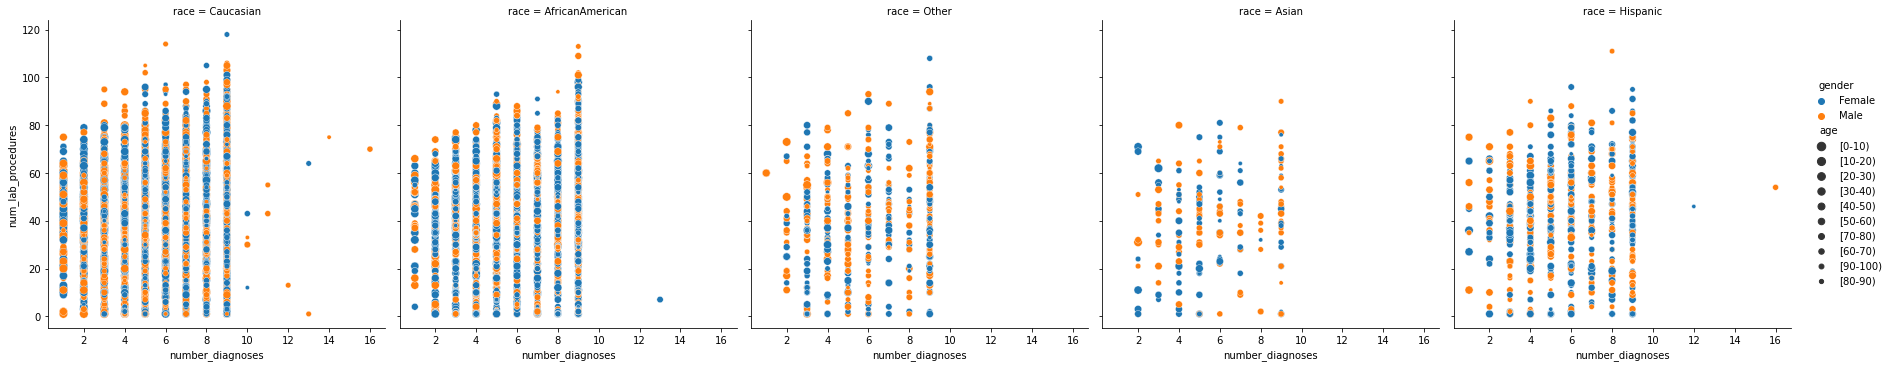

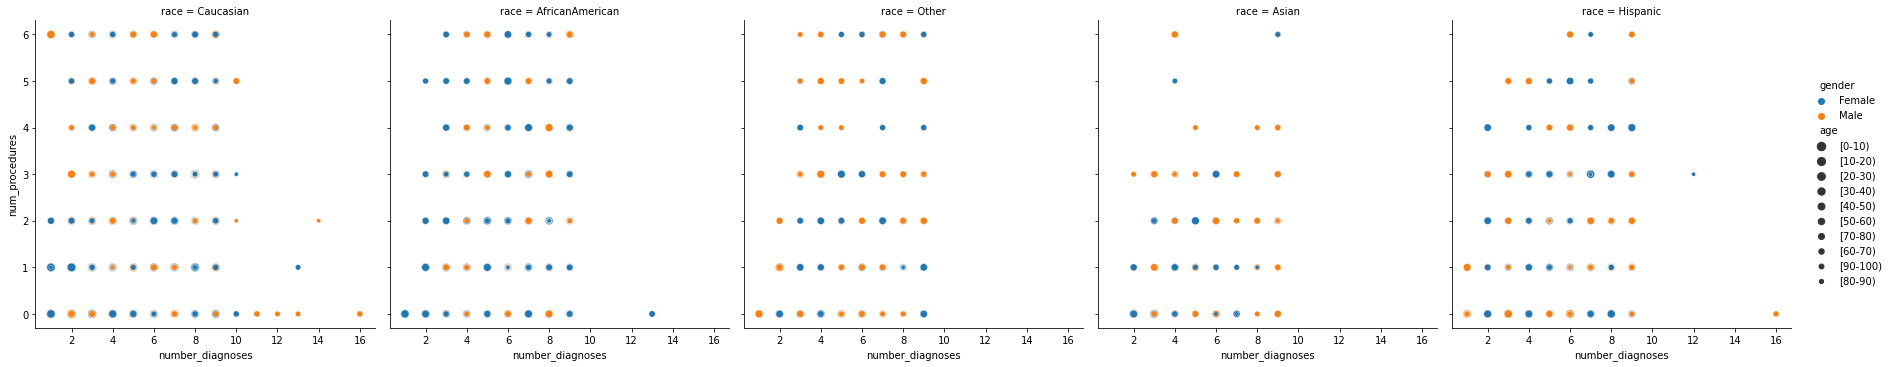

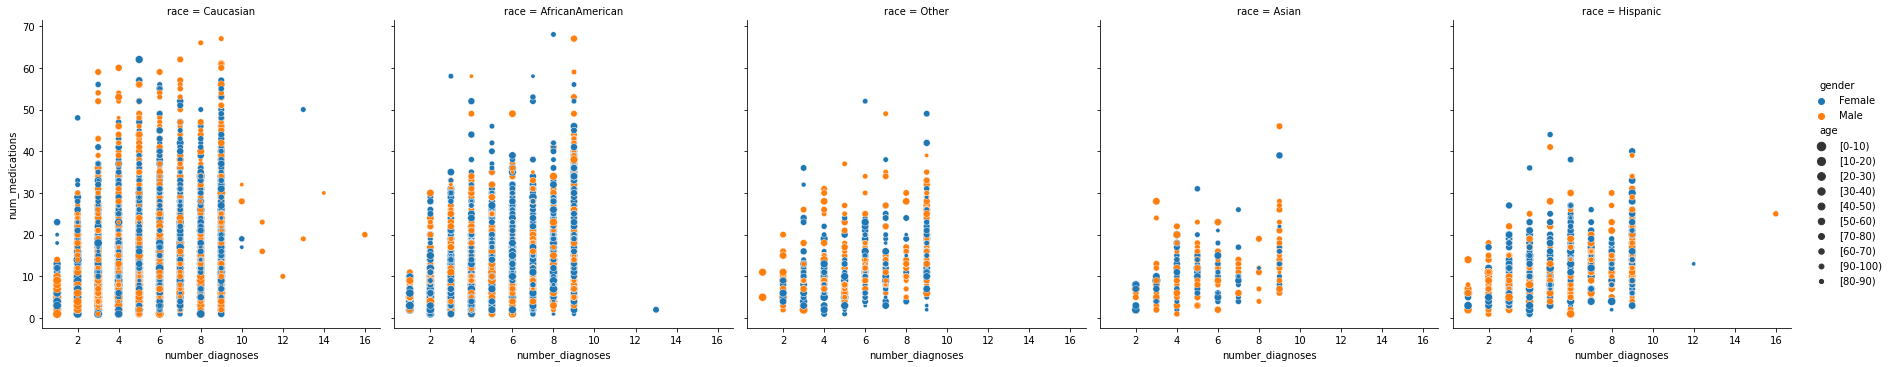

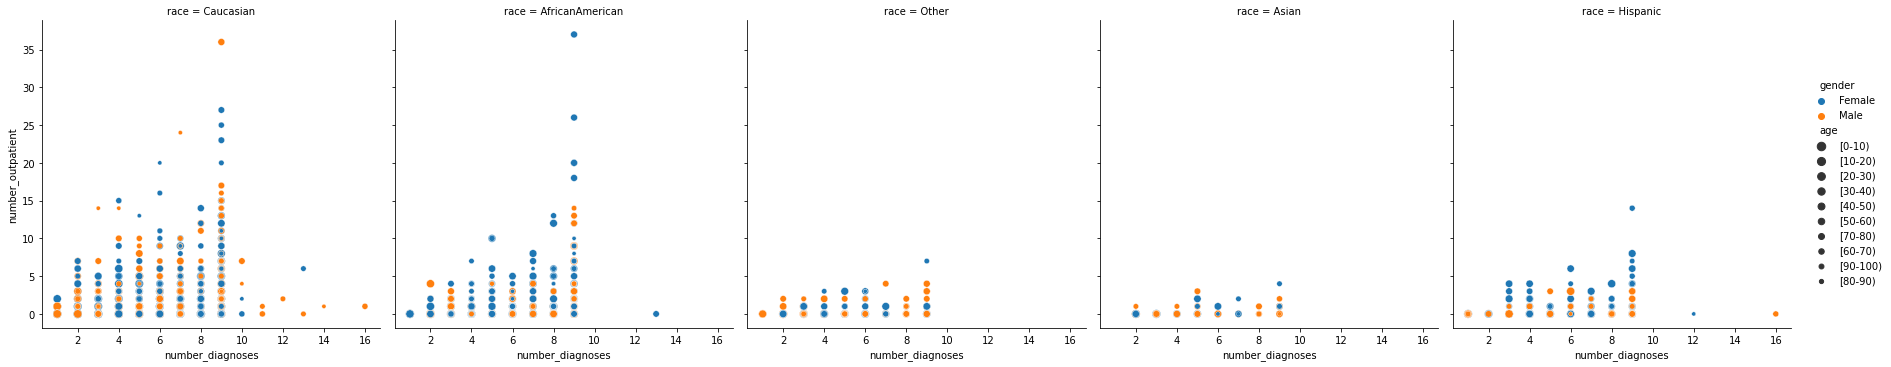

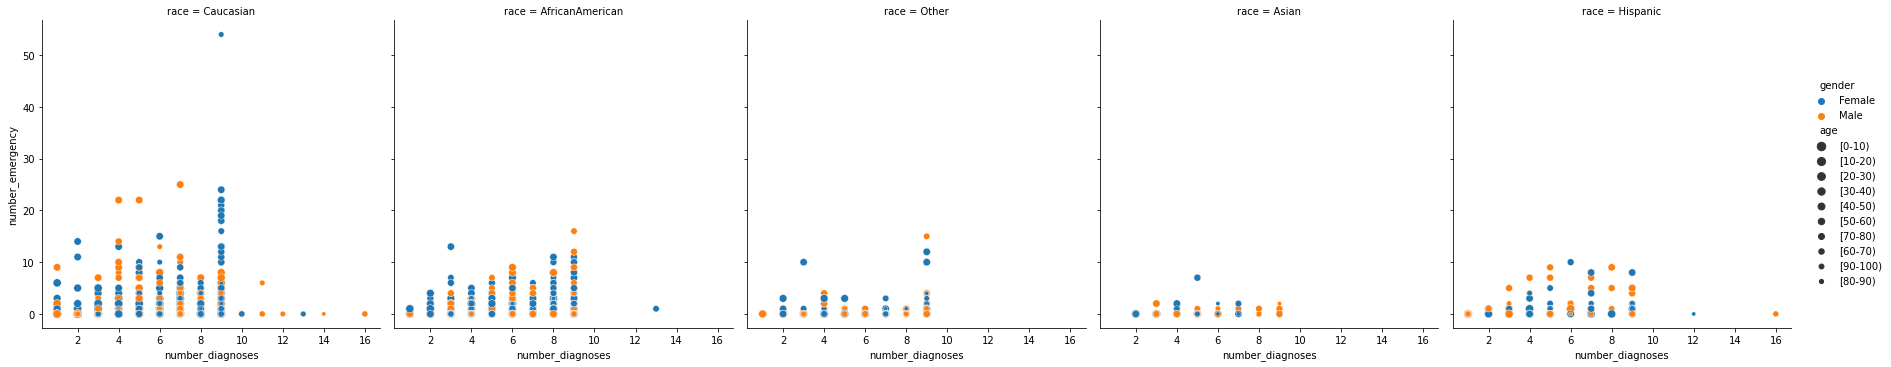

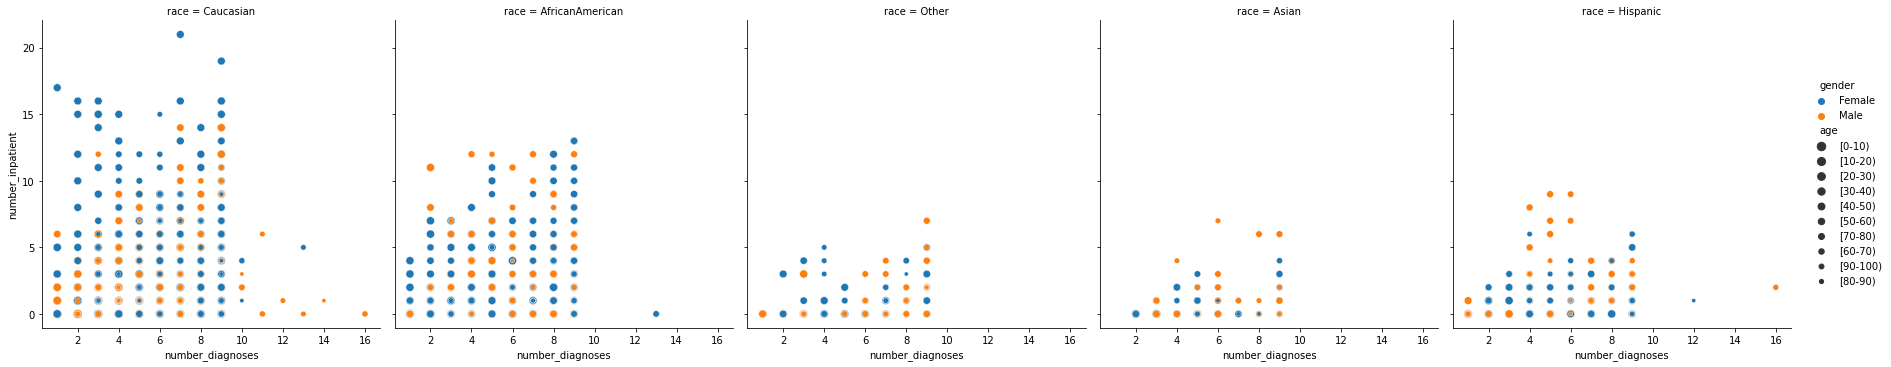

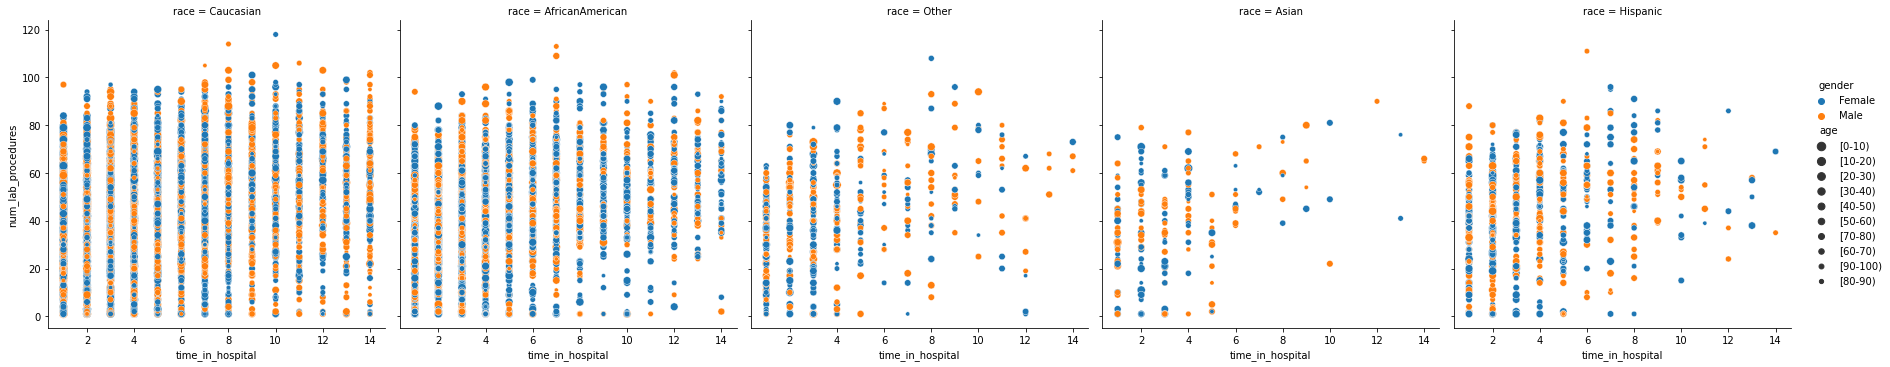

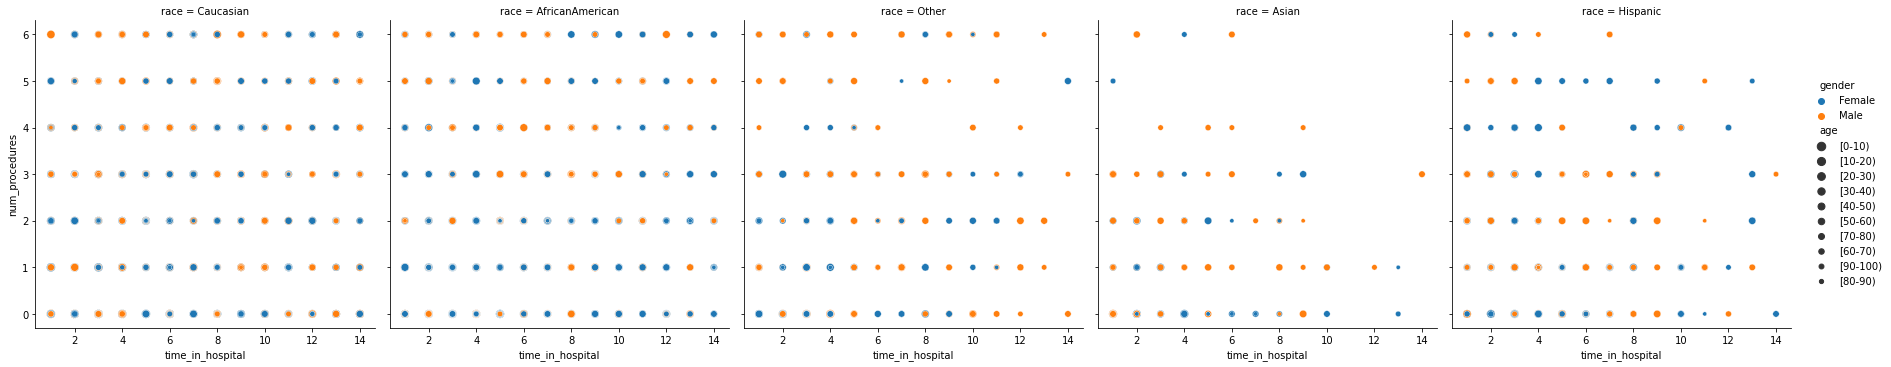

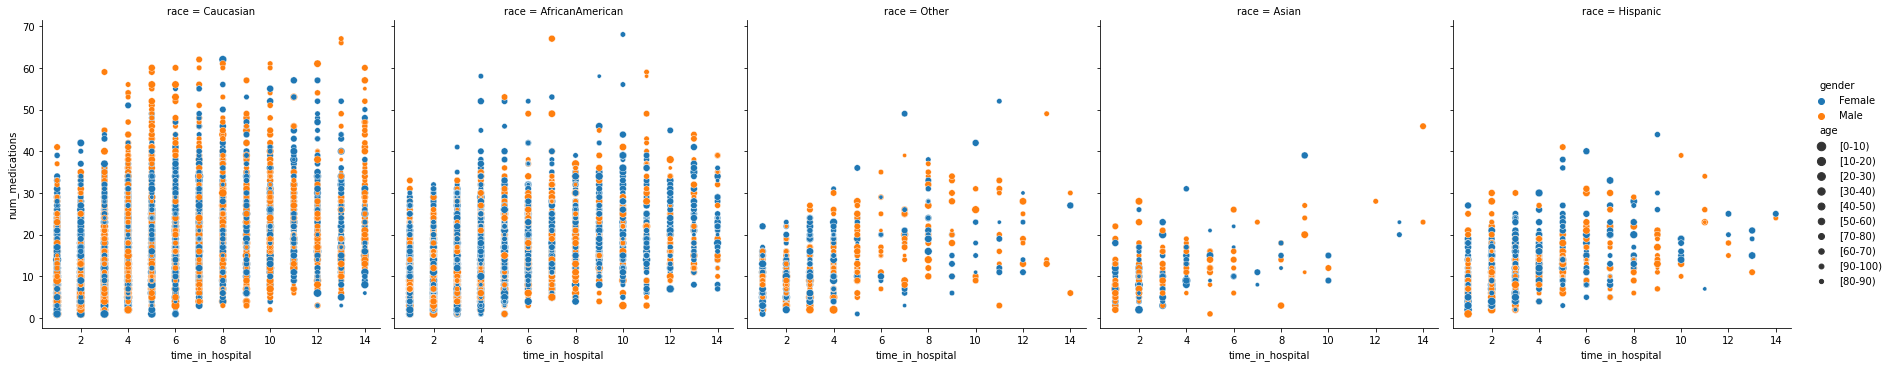

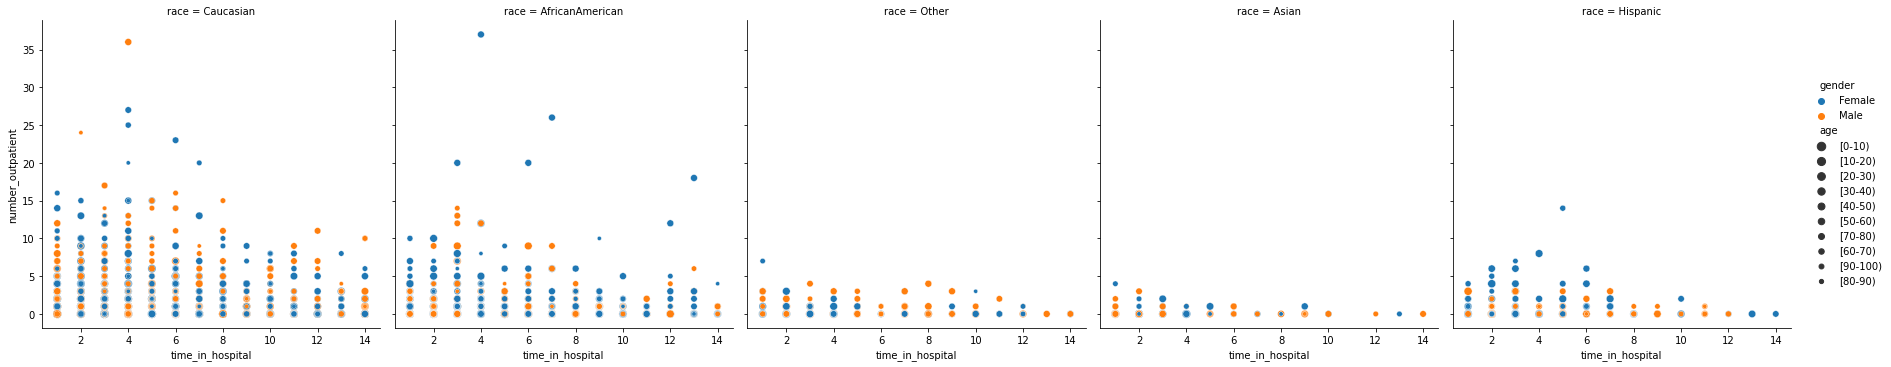

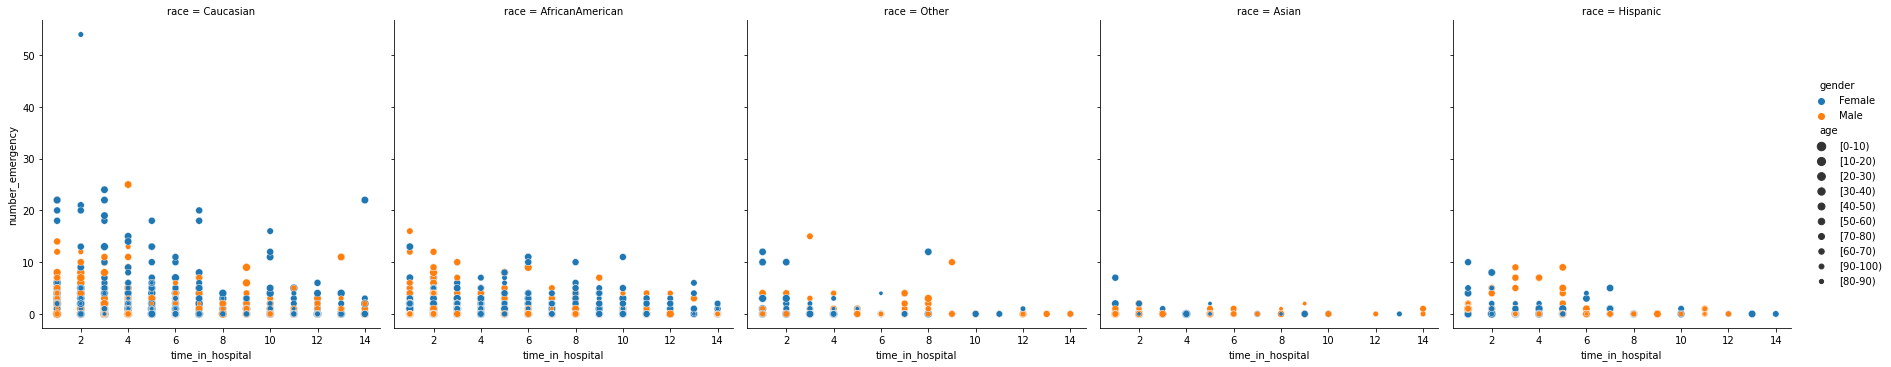

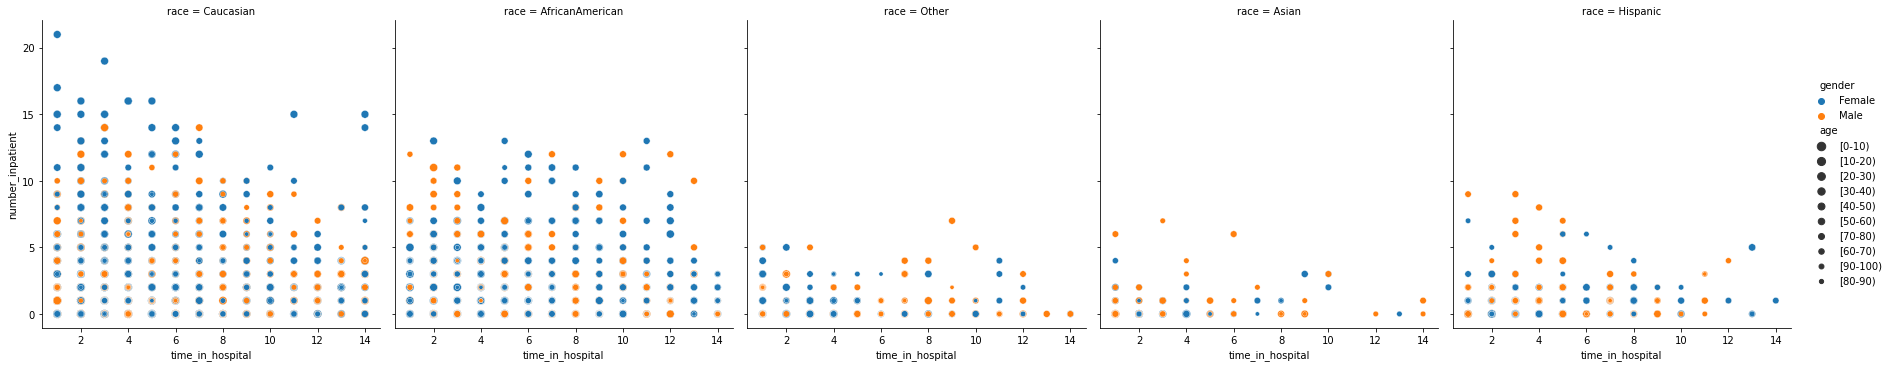

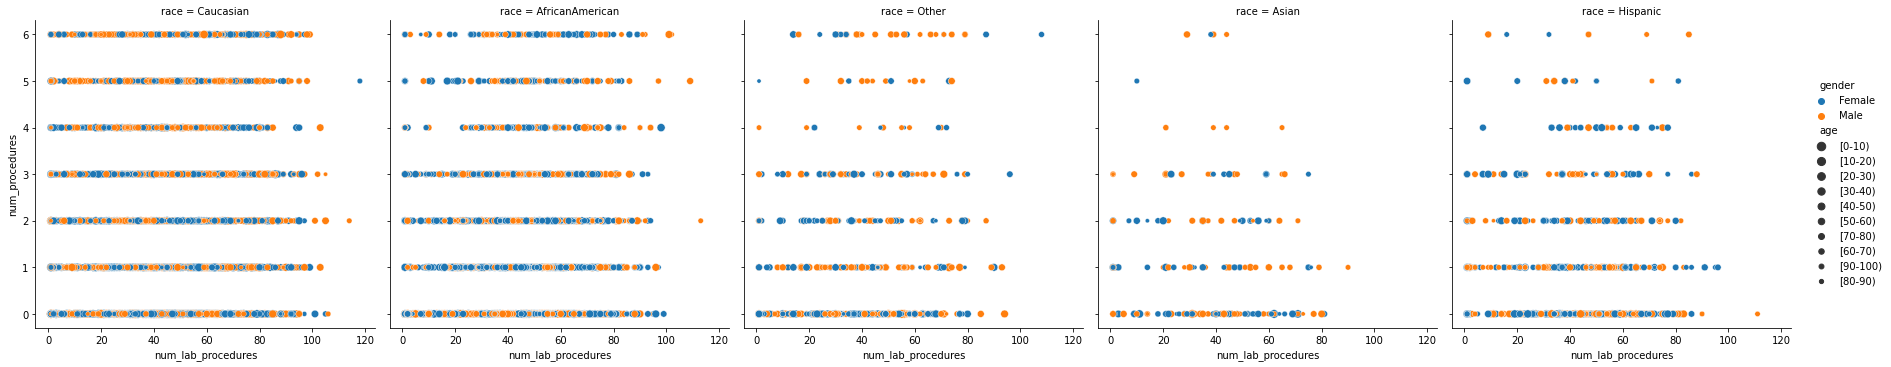

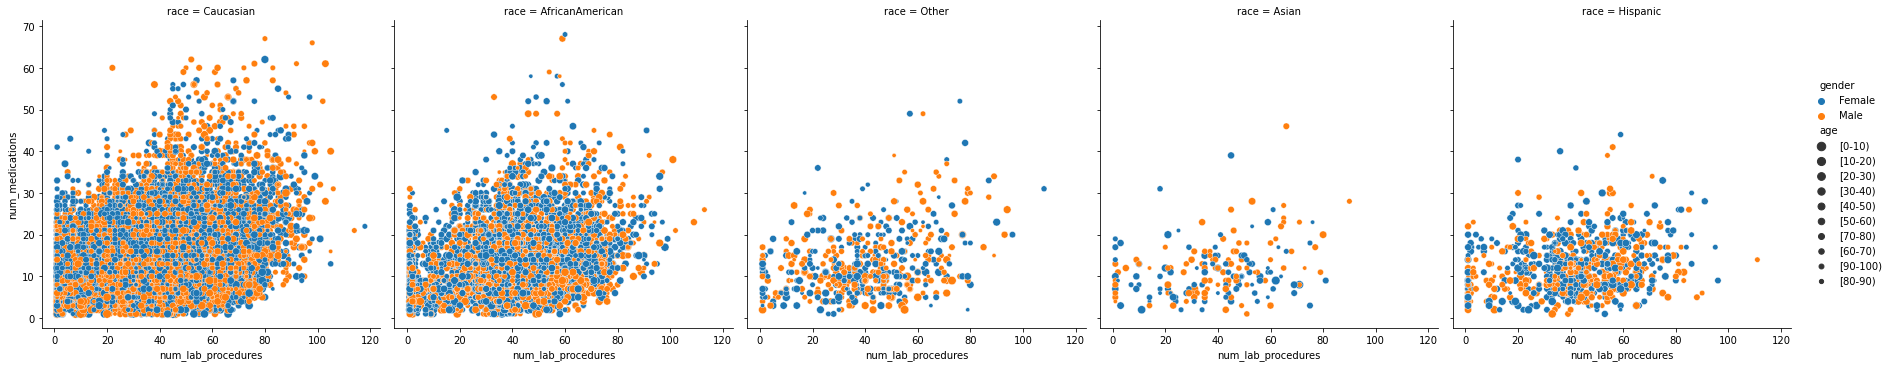

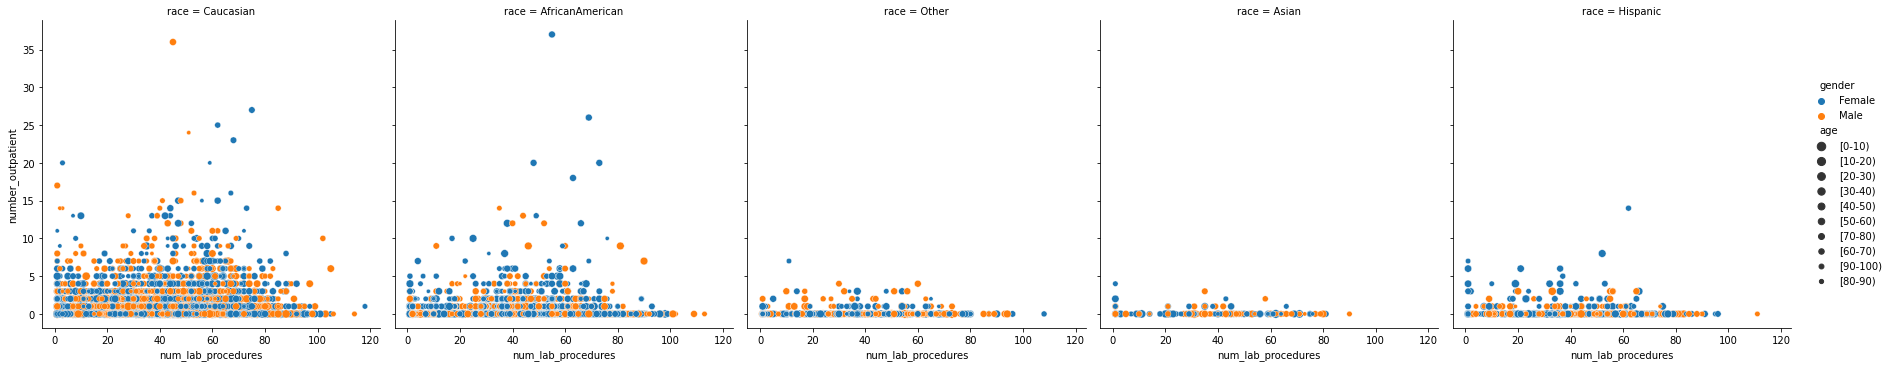

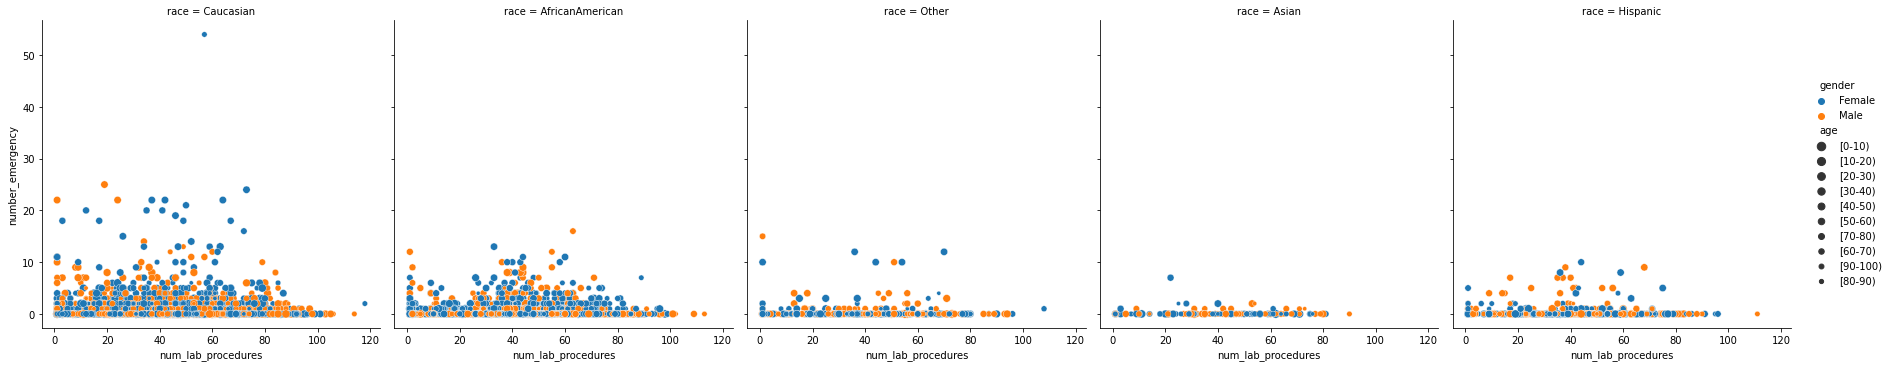

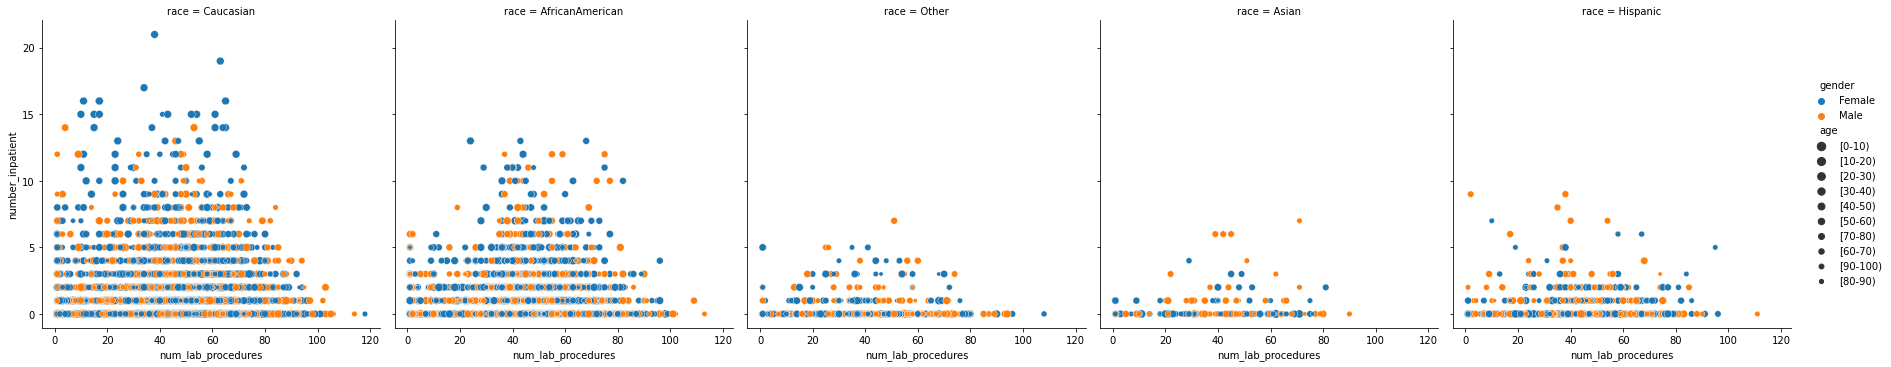

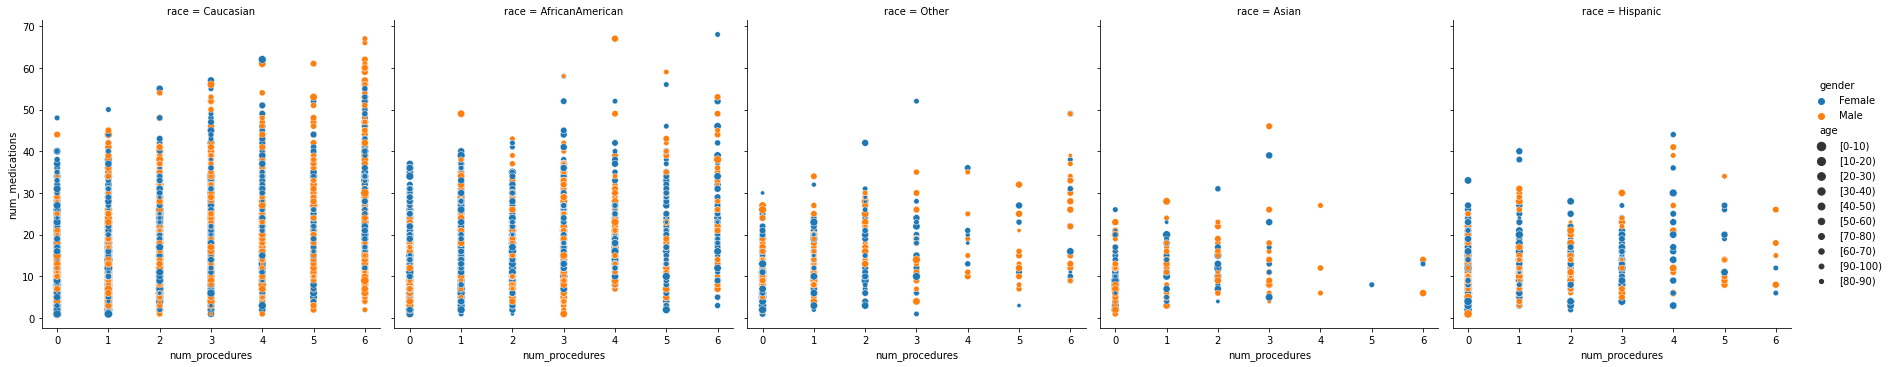

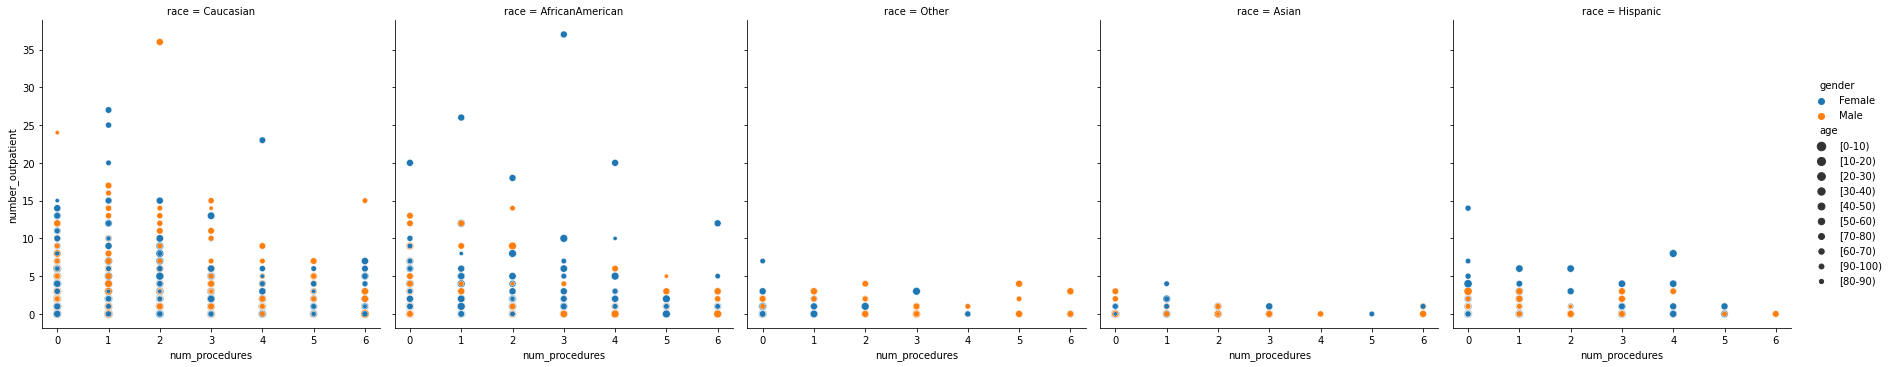

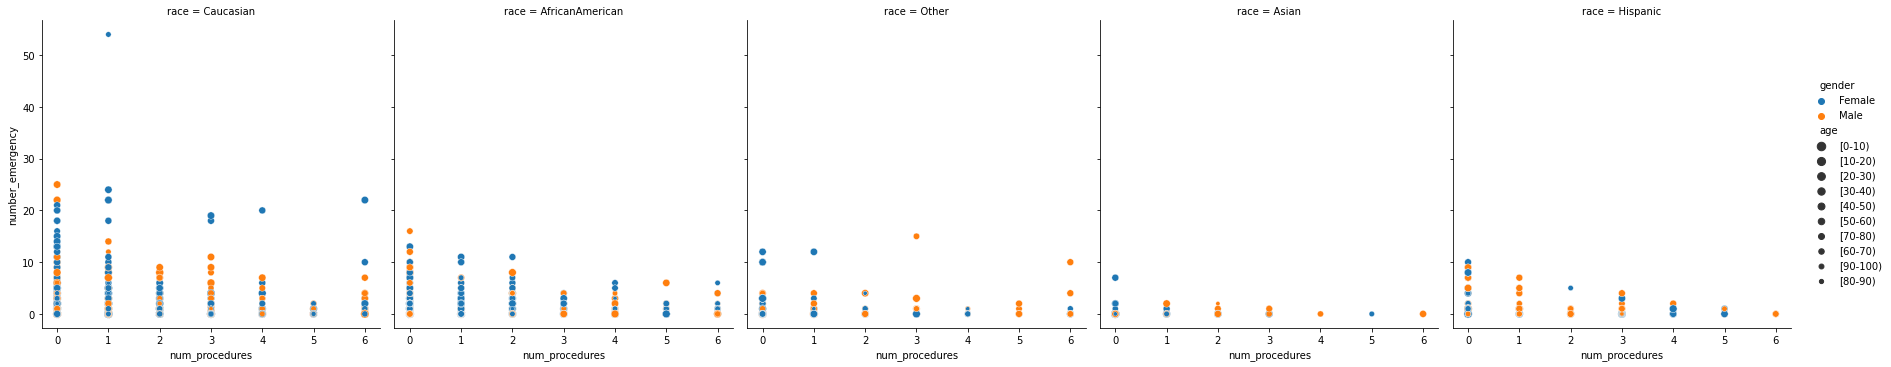

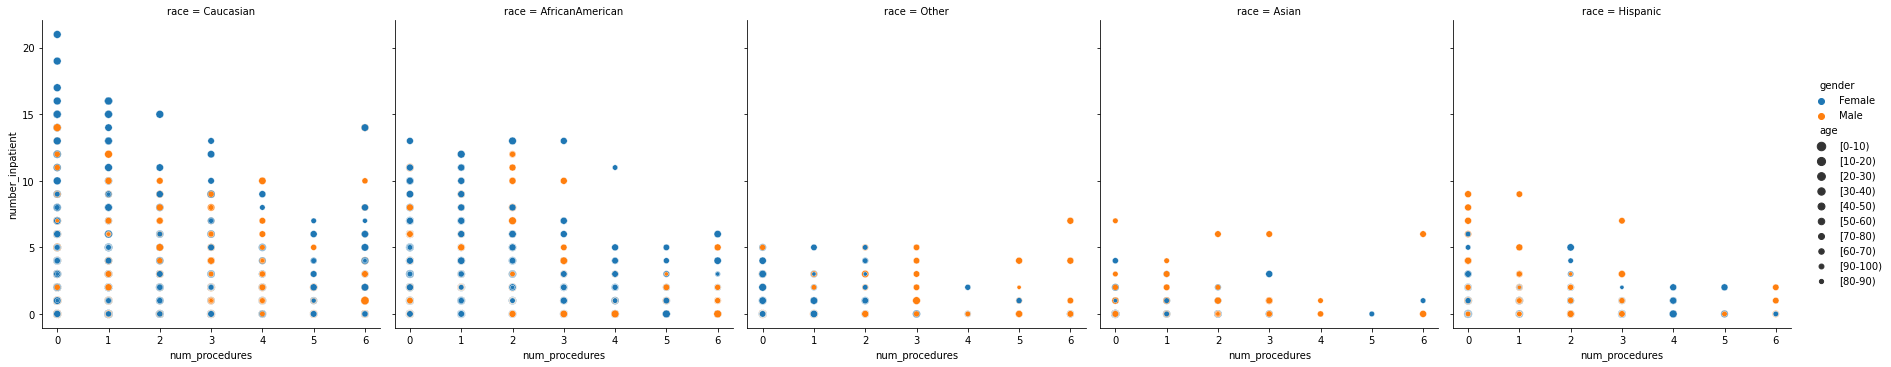

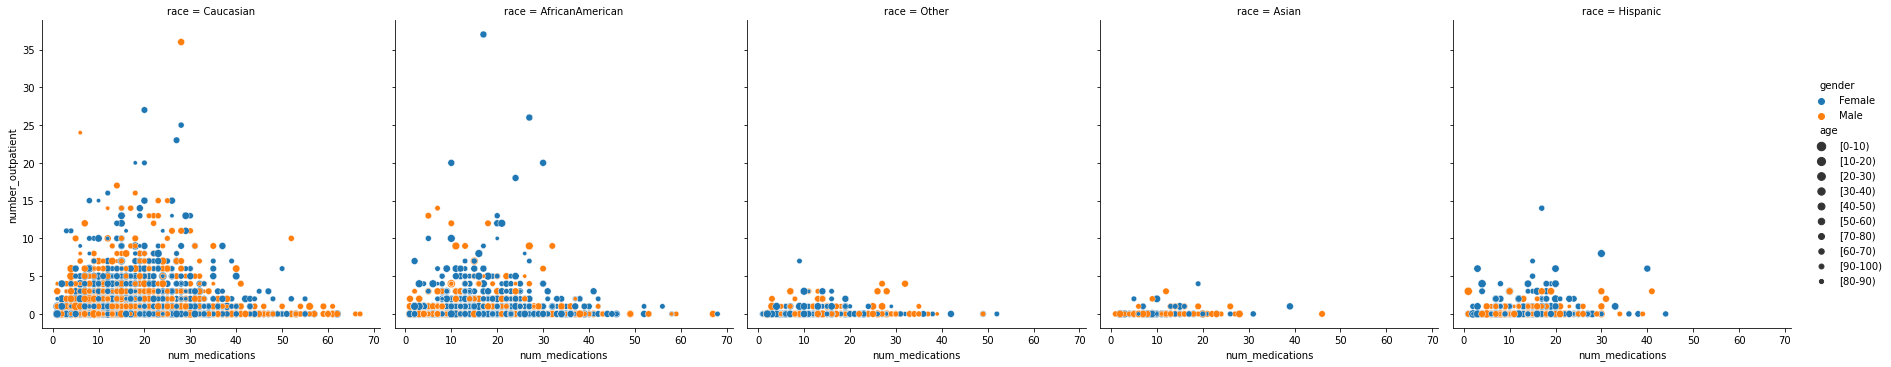

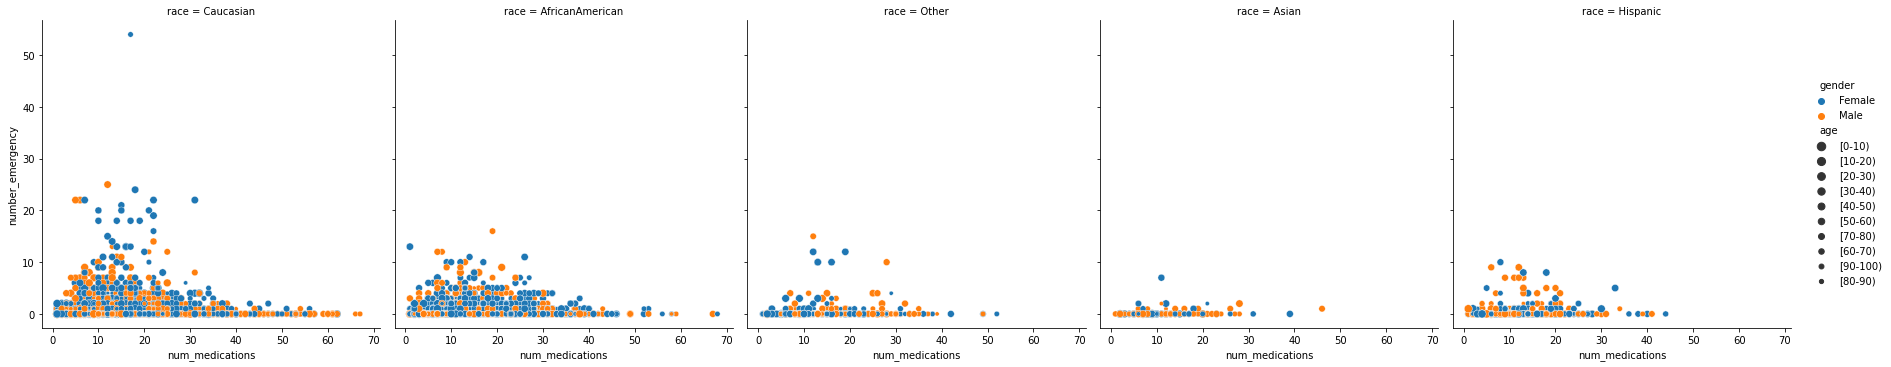

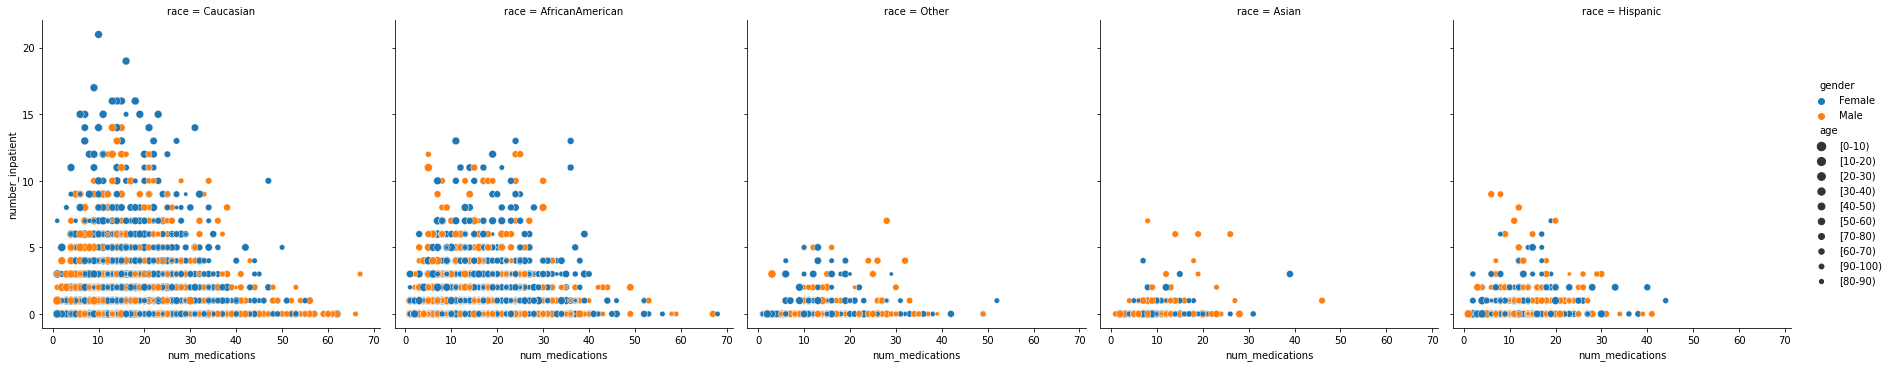

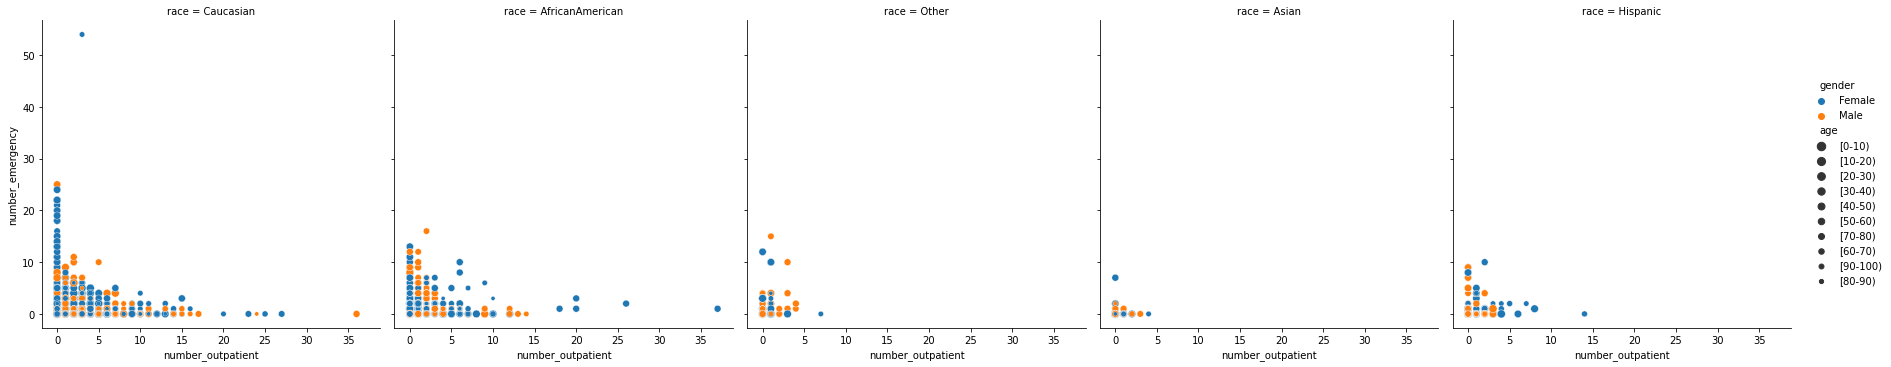

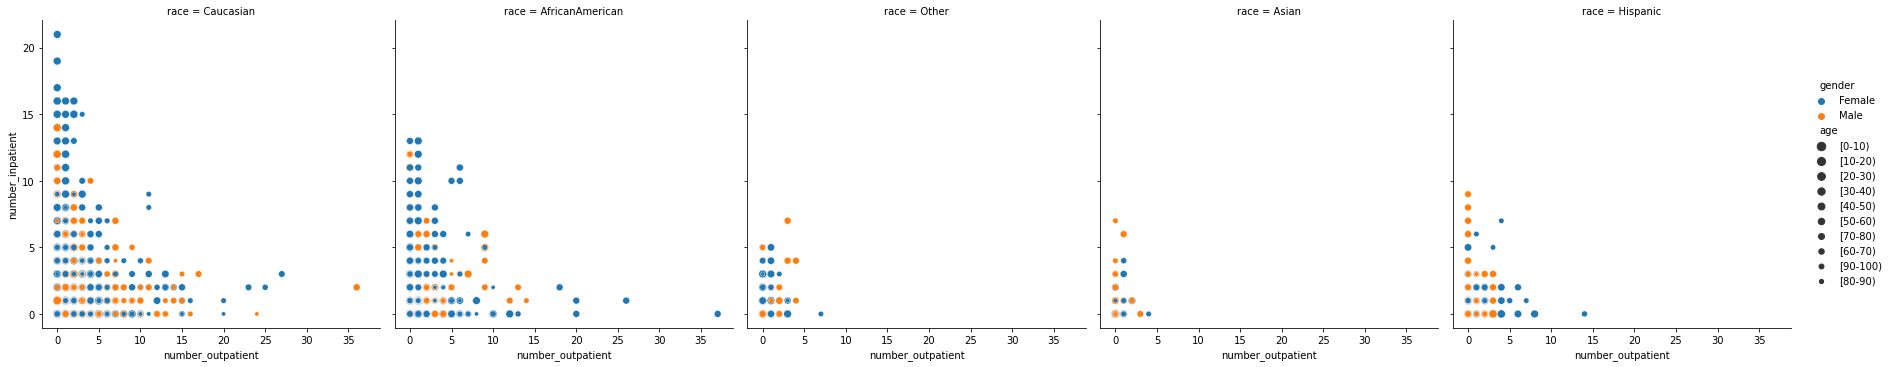

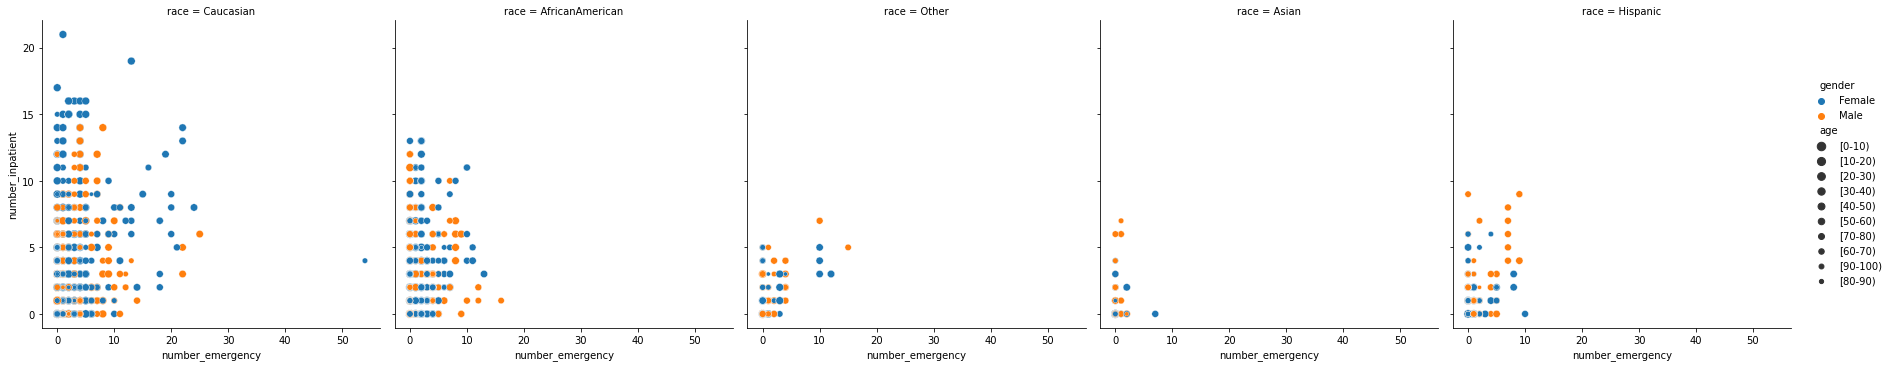

In [83]:
for i in range(len(NUMERIC_VAR)):
    for j in range(i+1,len(NUMERIC_VAR)):
        sns.relplot(
            data=plot_df, x=NUMERIC_VAR[i], y=NUMERIC_VAR[j], col="race",
            hue="gender", size="age", )